<img src="img/logoifsc.png">
<link rel="stylesheet" href="baseado_em_instancias.css">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Aprendizado Supervisionado Baseado em Instâncias
    
---

## Conteúdo
- Introdução
- Principal Algoritmo: kNN
- Parâmetros: k, medida de distância e função de predição
- Avaliação de modelos

## Introduçao

- O Aprendizado Baseado em Instâncias/Exemplos (Instance Based Learning ou também Lazy Learning) é um tipo de aprendizado que foca em experiências anteriores.

- Para exemplificar, vamos imaginar um consultório médico em que o especialista consegue salvar todas as entrevistas (anamneses) feitas a pacientes juntamente com o seu diagnóstico.

- Esses dados são anotados em fichas e guardados em um ficheiro. Vamos supor que ao longo do anos adquirimos muita experiência armazenando fichas de pacientes.

- Ao chegar um paciente novo, o especialista pode fazer uma entrevista média ao paciênte e procurar no ficheiro qual é o paciente que apresentou, no passado, a entrevista média mais parecida. Uma vez achado o mais parecido podemos atribuir o diagnóstico daquele, a este novo paciente.

#### Exemplo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')[['sepal_length','sepal_width','species']]
df.head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


(4.108440962934658, 8.091559037065341, 1.868657667791526, 4.5313423322084745)

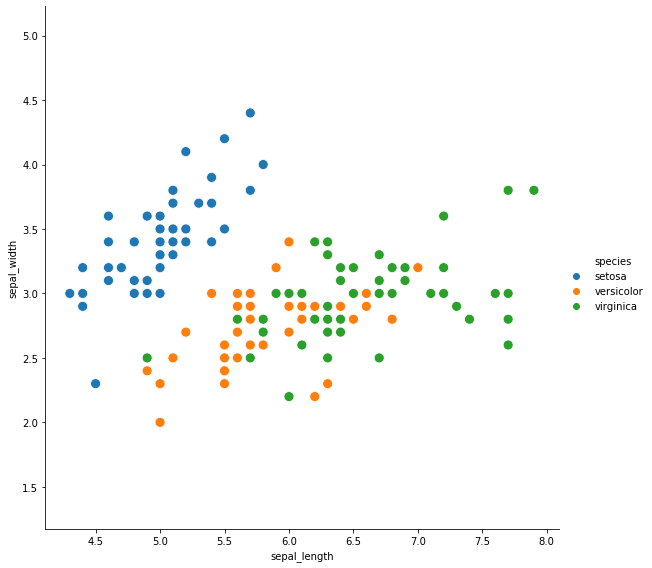

In [4]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=8, s=100)
plt.axis('equal')

- Qual é a classe do exemplo representada pelo X em vermelho? (1)

(4.108440962934658, 8.091559037065341, 1.868657667791526, 4.5313423322084745)

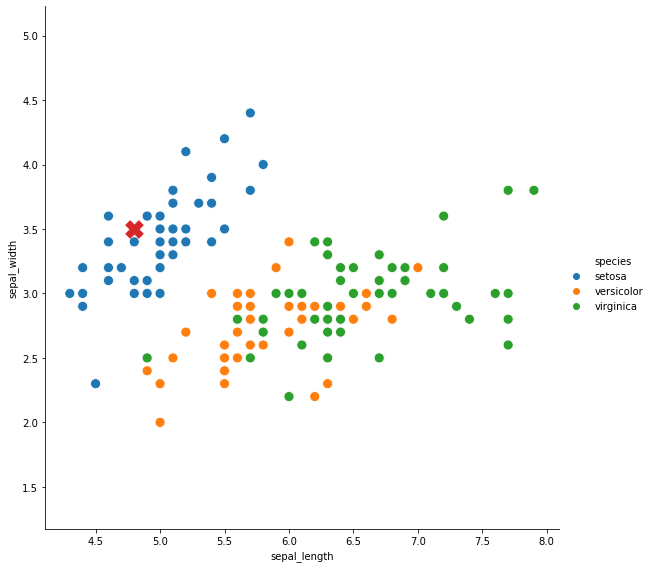

In [5]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=8, s=100)
plt.scatter(x = 4.8, y = 3.5, marker='X', color=sns.color_palette()[3], s=300)
plt.axis('equal')

(4.108440962934658, 8.091559037065341, 1.868657667791526, 4.5313423322084745)

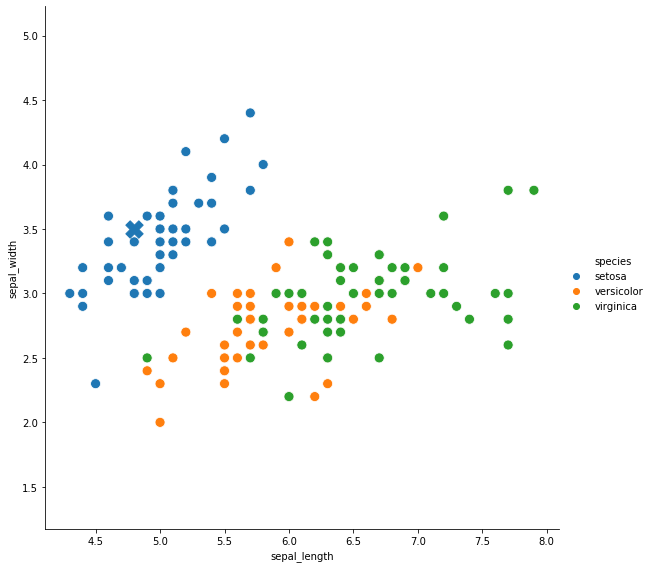

In [6]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=8, s=100)
plt.scatter(x = 4.8, y = 3.5, marker='X', color=sns.color_palette()[0], s=300)
plt.axis('equal')

- Qual é a classe do exemplo representada pelo ponto preto? (2)

(4.108440962934658, 8.091559037065341, 1.868657667791526, 4.5313423322084745)

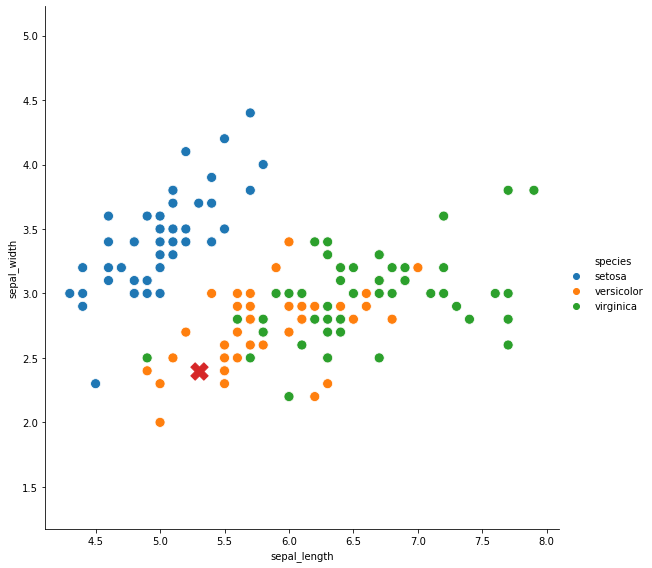

In [7]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=8, s=100)
plt.scatter(x = 5.3, y = 2.4, marker='X', color=sns.color_palette()[3], s=300)
plt.axis('equal')

(4.108440962934658, 8.091559037065341, 1.868657667791526, 4.5313423322084745)

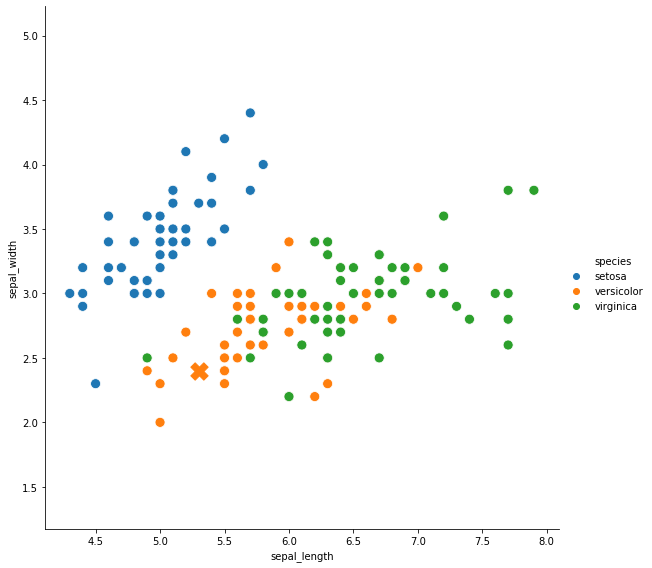

In [8]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=8, s=100)
plt.scatter(x = 5.3, y = 2.4, marker='X', color=sns.color_palette()[1], s=300)
plt.axis('equal')

- Qual é a classe do exemplo representada pelo ponto preto? (3)

(4.108440962934658, 8.091559037065341, 1.868657667791526, 4.5313423322084745)

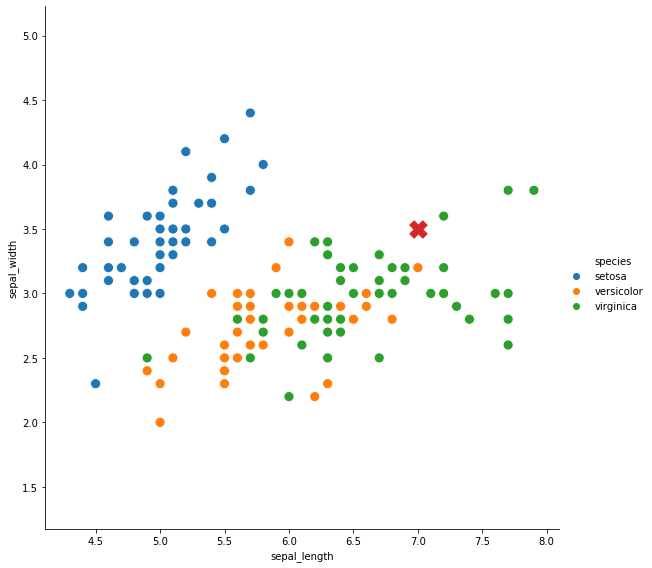

In [9]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=8, s=100)
plt.scatter(x = 7, y = 3.5, marker='X', color=sns.color_palette()[3], s=300)
plt.axis('equal')

(4.108440962934658, 8.091559037065341, 1.868657667791526, 4.5313423322084745)

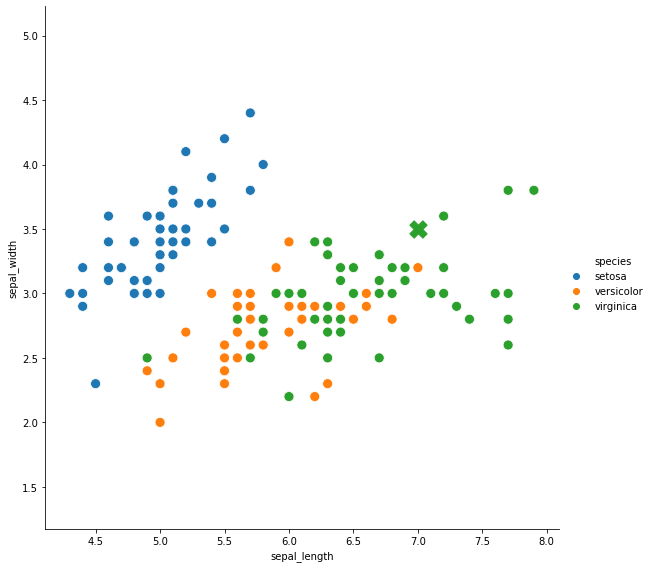

In [10]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=8, s=100)
plt.scatter(x = 7, y = 3.5, marker='X', color=sns.color_palette()[2], s=300)
plt.axis('equal')

- Em todos os casos anteriores foi simples de atrbiuir a classe ao novo exemplo baseado no elemento mais próximo, mas nem sempre temos essa sorte.

(4.108440962934658, 8.091559037065341, 1.868657667791526, 4.5313423322084745)

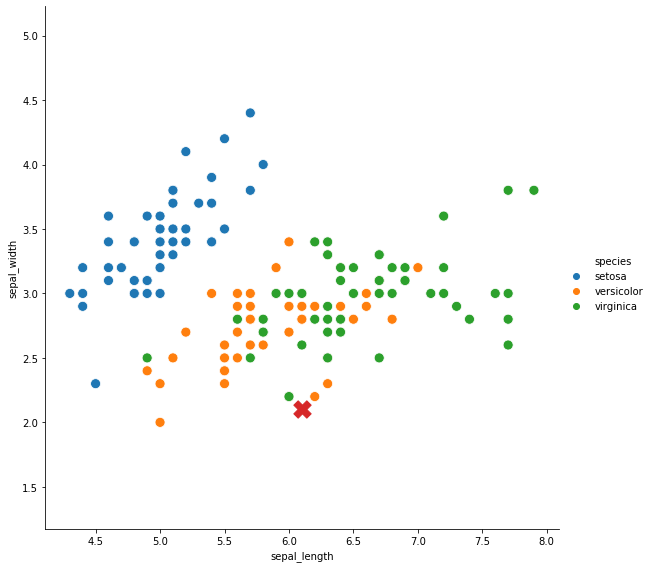

In [11]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data = df, height=8, s=100)
plt.scatter(x = 6.1, y = 2.1, marker='X', color=sns.color_palette()[3], s=300)
plt.axis('equal')

# Principal Algoritmo

- O Instance Based Learning (IBL) tem como seu principal algoritmo o k-Nearest Neighbors (kNN) ou k-Vizinhos Mais Próximos.

- Esse algoritmo consiste em **classificar um novo exemplo do problema baseado na classe do(s) exemplo(s) mais similares no conjunto de treinamento**.

- Esse algoritmo possui os seguintes parâmetros, como:
    - O **valor $k$** do número de exemplos mais similares do conjunto de treinamento que serão utilizados.
    - Uma **função de distância** ou similaridade, de forma a determinar numericamente a distância entre duas instâncias/exemplos.
    - Uma **função de predição** que decida, dentre as classes das $k$ instâncias mais próximas, qual será a classe de novo exemplo.
    - *Quais exemplos* do conjunto de treinmento serão usados para procurar os mais similares (todos? os melhores?).    

# Parâmetros do Algoritmo

## O valor de $k$

- O algoritmo mais comum utiliza $k=1$ e é chamado de 1-Nearest Neighbor ou simplesmente Nearest Neighbor.

- Para este casso o parâmetro da função de predição é obvia, pois será atribuído a uma novo exemplo a classe do exemplo mais similar.

- Em geral esta configuração traz bons resultados, pode ter o problema da sensibilidade a ruídos, que podem atrapalhar algumas classificações.

- Vamos verificar isso de forma gráfica.

- O espaço no 1NN é dividido da seguinte forma:

Text(0.5, 1.0, 'kNN (k = 1)')

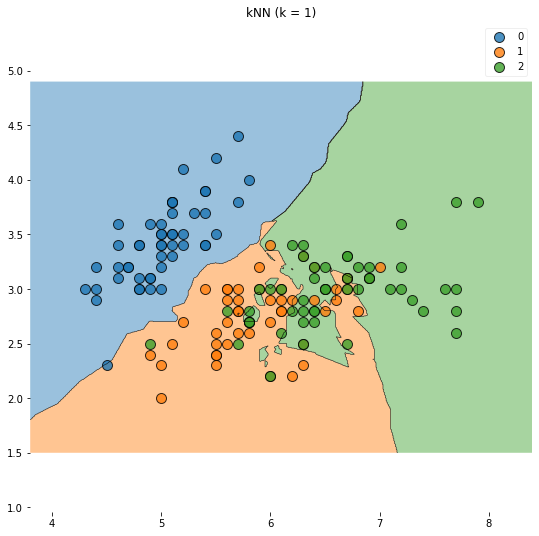

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
target = 'species'
X = df.drop([target], axis=1)
y = df[target].factorize()[0]
model.fit(X,y)

from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X.to_numpy(), y, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
plt.axis('equal')
plt.title('kNN (k = 1)')

- Para termos uma idéia de como era dividido o espaço de uma árvore de decisão podemos tomar a seguinte árvore para o mesmo problema:

Text(0.5, 1.0, 'Decision Tree')

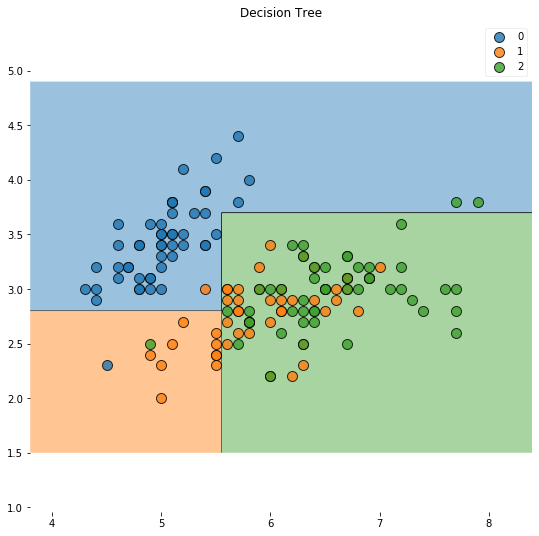

In [15]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion="entropy", max_depth=2)
model1.fit(X,y)

fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X.to_numpy(), y, clf=model1, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
plt.axis('equal')
plt.title('Decision Tree')

(3.8, 8.4, 1.5, 4.9)

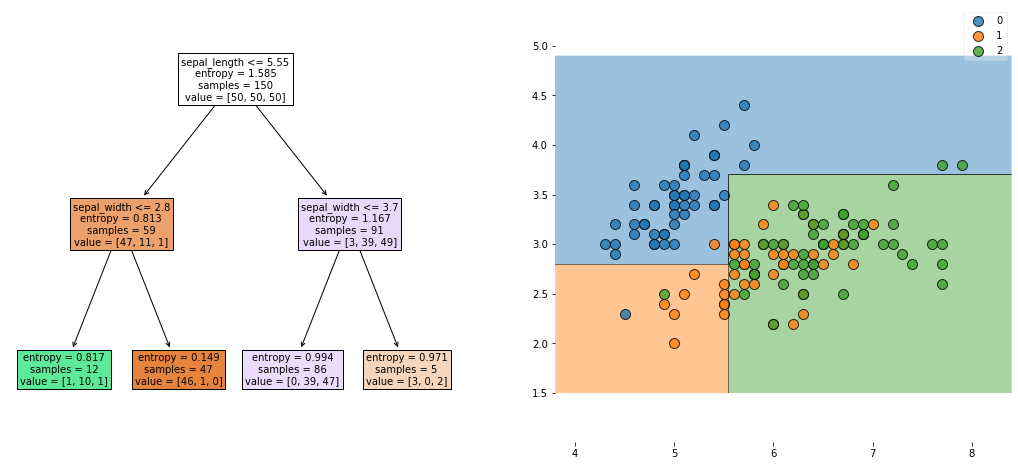

In [16]:
fig, ax = plt.subplots(1,2,figsize=(18, 8))

from sklearn.tree import plot_tree
plot_tree(model1, filled=True, feature_names = X.columns, ax=ax[0])
plot_decision_regions(X.to_numpy(), y, clf=model1, legend=1, ax= ax[1], markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
plt.axis('equal')

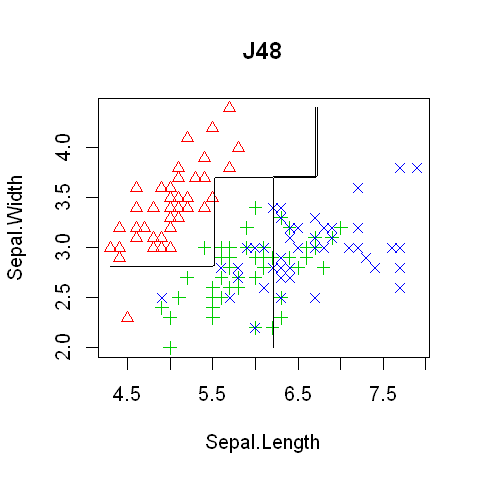

In [15]:
options(repr.plot.width=4, repr.plot.height=4)
decisionplot(model.J48, dt, class = "Species", main = "J48", showgrid = FALSE)

- Para $k=2$

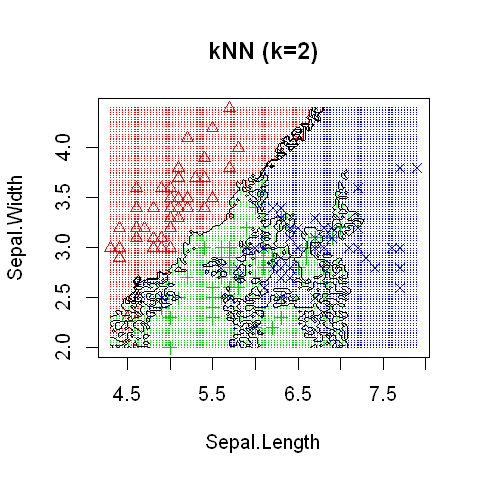

In [16]:
model.k2 <- knn3(Species ~ ., data=dt, k = 2)
decisionplot(model.k2, dt, class = "Species", main = "kNN (k=2)")

- Para $k=5$

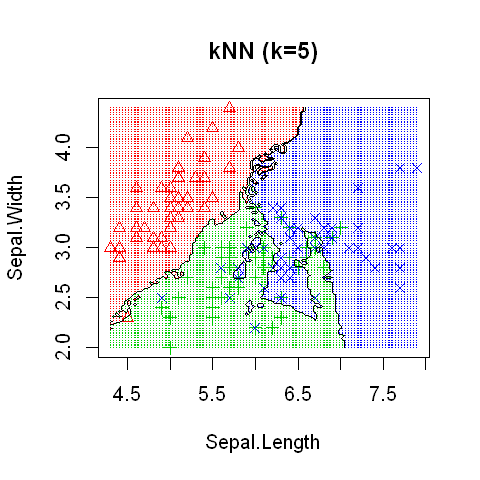

In [17]:
model.k5 <- knn3(Species ~ ., data=dt, k = 5)
decisionplot(model.k5, dt, class = "Species", main = "kNN (k=5)")

- Para $k=10$

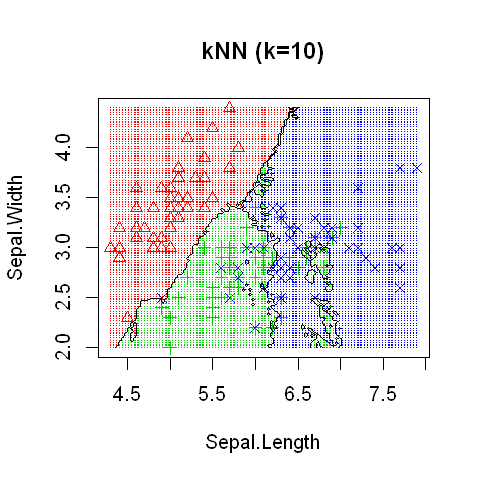

In [18]:
model.k10 <- knn3(Species ~ ., data=dt, k = 10)
decisionplot(model.k10, dt, class = "Species", main = "kNN (k=10)")

- Para $k=20$

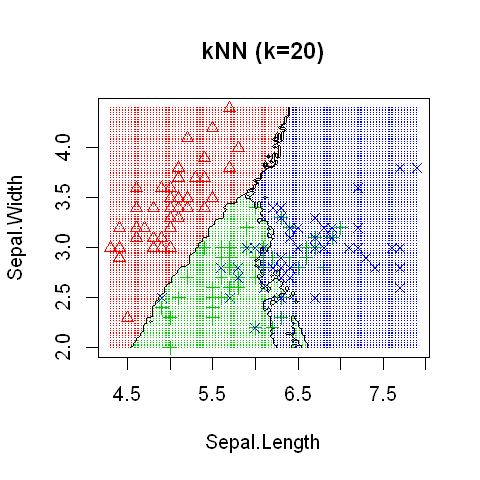

In [19]:
model.k20 <- knn3(Species ~ ., data=dt, k = 20)
decisionplot(model.k20, dt, class = "Species", main = "kNN (k=20)")

- O que observamos então é que à medida que aumentamos o valor de $k$ estamos suavizando o espaço de classificação.

- Esta visualização apresenta a classificação em 2 dimensões, mas o mesmo comportamento é observado para um número maior de dimensões.

- Não há um valor de $k$ que seja ótimo para todos os problemas, então esse valor deve ser ajustado de maneira a maximizar alguma métrica de qualidade, como accuracy, precision ou recall.

## Função de distância

- A função de distância é chave fundamental do processo de classificação usando o kNN.

- Embora haja funções de distância de propósito geral, como a Distância Euclidiana, o sucesso da classificação depende de se a função de distância utilizada foi apropriada aos dados.

- Quando temos atributos numéricos, como no caso dos conjuntos de dados Iris e Wine (vinhos portugueses), a distância Euclidiana se torna uma boa medida, mas na presença de dados categóricos ou nominais ordinais precisamos tomar alguns cuidados.

### Distância Euclidiana

- A função da Distância Euclidana (também chamada de $L_2$), entre duas instâncias $P$ e $Q$, ambas representadas por $m$ dimensões é:

$$D_{L_2}(P,Q) = \sqrt{\sum_{i=1}^{m} (p_i - q_i)^2} = \Bigg( \sum_{i=1}^{m} (p_i - q_i)^2 \Bigg)^{1/2} $$ 

- Assim, vamos pegar os dois primeiros exemplos para os atributos Septal.Length e Sepal.Width

In [20]:
P <- dt[1,1:2]
Q <- dt[2,1:2]

In [21]:
P

Sepal.Length,Sepal.Width
5.1,3.5


In [22]:
Q

,Sepal.Length,Sepal.Width
2,4.9,3


Diferença entre os valores das dimensões, $p_i - q_i$

In [23]:
P-Q

Sepal.Length,Sepal.Width
0.2,0.5


Quadrados das diferenças de cada dimensão, onde $(0.2)^2=0.04$ e $(0.5)^2=0.25$

In [24]:
(P-Q)^2

,Sepal.Length,Sepal.Width
1,0.04,0.25


Soma dos Quadrados das Diferenças

In [25]:
sum((P-Q)^2)

[1] 0.29

- Aplicação Distância Euclidiana

$$D_{L_2}(P,Q) = \sqrt{\sum_{i=1}^{m} (p_i - q_i)^2} = \sqrt{(5.1-4.9)^2 + (3.5-3.0)^2} = \sqrt{0.29} = 0.54 $$

- O valor da Distância Euclidiana entre esse dois exemplos é 0.54.

- O Problema da Escala das Dimensões:
    - Quando temos duas dimensões com escalas muito diferente podemos ter problemas sérios de distância.
    - Suponha um conjunto de dados com atributos numéricos, como idade e salário, onde valores de idade ficam entre 20 e 80 e valores de salário ficam entre 90 e 500 e, portanto, possuem escalas bem diferentes.

In [26]:
library(data.table)
library(ggrepel)
library(ggplot2)

In [27]:
# Conjunto de dados de Kaggle: https://www.kaggle.com/varungitboi/employee-salary-dataset
dt <- fread("data/employee_data.csv")[,.(age,salary = salary/10)][1:5,]
head(dt[,.(row=1:nrow(dt),age,salary)])

row,age,salary
1,36,229.7
2,55,113.4
3,61,496.9
4,29,90.2
5,34,357.4


- Visualização de scatter-plot desses dados

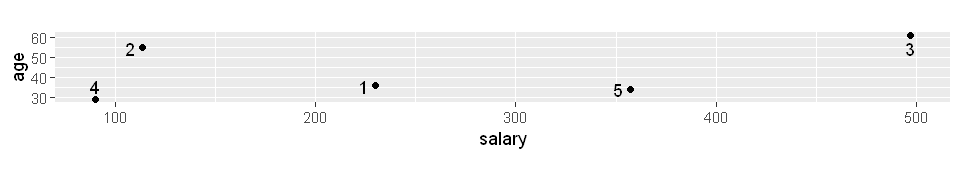

In [28]:
options(repr.plot.width=8, repr.plot.height=1.5)
ggplot( dt, aes(y=age, x=salary, label=1:nrow(dt)) ) + geom_point() + coord_fixed() + geom_text_repel()

- Matriz de distância entre todos os pares de instâncias
    - Detectamos que os elementos mais próximos são 2 e 4, como visualmente podemos confirmar.

In [29]:
dist(dt)

          1         2         3         4
2 117.84180                              
3 268.36699 383.54693                    
4 139.67552  34.84595 407.95697          
5 127.71566 244.90202 142.08888 267.24678

- Visualização scatter-plot desses dados, normalizando os eixos (o que é feito naturalmente por qualquer função de plot)

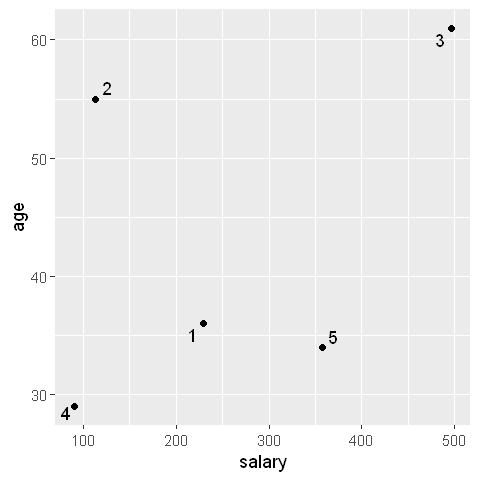

In [30]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot( dt, aes(y=age, x=salary, label=1:nrow(dt)) ) + geom_point() + geom_text_repel()

- Aqui observamos que ao normalizar as dimensões, os elementos mais próximos não sao mais 2 e 4. O espaço mudou.

In [31]:
normalize <- function(x) { (x-min(x))/(max(x)-min(x)) }
dt.norm <- dt[,.(age.norm = normalize(age), salary.norm = normalize(salary) )]

In [34]:
dt.norm <- round(dt.norm,2)

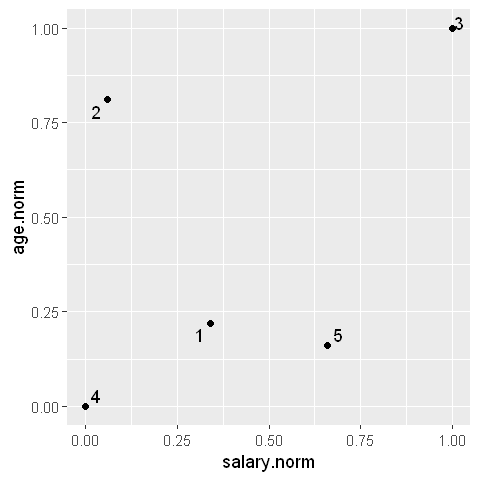

In [35]:
ggplot( dt.norm, aes(y=age.norm, x=salary.norm, label=1:nrow(dt)) ) + geom_point() + geom_text_repel()

- Matriz de distância entre todos os pares de instâncias com seus dados normalizados
    - Detectamos que os elementos mais próximos são 1 e 5, como visualmente podemos confirmar.

In [38]:
round(dist(dt.norm),2)

     1    2    3    4
2 0.65               
3 1.02 0.96          
4 0.40 0.81 1.41     
5 0.33 0.88 0.91 0.68

- Como ambas as dimensões estão no intervalo $[0,1]$ podemos acreditar de que o valor da distância $0.32$ entre as instâncias 1 e 5 não possui tendência de uma ou outra dimensão.
- Esta é uma das maiores utilidades de normalizar valores. Neste caso escolhemos a abordagem de transformar para o intervalo $[0,1]$, mas poderíamos usar outra abordagem, como por exemplo standarizar (normalizar por desvio padrão).

### Distância Manhattan

- A distância Manhattan (ou city block ou distância $L_1$) é uma medida de distância que usa a soma do módulo das diferências, como mostra a fórmula

$$D_{L_1}(P,Q) = \sum_{i=1}^{m} |p_i - q_i|$$

- Representação Visual da distância Manhattan:
    - A linha verde representa a distância Euclidiana
    - As outras linhas representam diferentes formas da distância Manhattan, mas que todas possuem a mesma distância.

<figure>
  <img src="img/manhattan.png" alt="Imagem Distância Manhattan" style="width:50%">
  <figcaption>Fonte: https://en.wikipedia.org/wiki/Taxicab_geometry.</figcaption>
</figure>

### Distâncias da Norma $L_p$

- Existem outras fórmulas parecidas para o cáculo de distância, como a distância Minkowski. Mas esta última, junto com a distância Manhattan e a Euclidiana fazem parte de uma família de distâncias, chamadas distâncias da Norma $L_p$.

$$D_{L_p}(P,Q) = \Bigg( \sum_{i=1}^{m} (p_i - q_i)^{p} \Bigg)^{\frac{1}{p}} $$

- Para a distância Manhattan, o valor de $p=1$
- Para a distância Euclidiana, o valor de $p=2$

- Uma comparação entre as medidas Manhattan e Euclidiana
 
<figure>
  <img src="img/lpnorm.png" alt="Imagem Distâncias Norma Lp" style="width:50%">
  <figcaption>Fonte: https://stackoverflow.com/questions/6182005/rough-computation-of-distance-between-2-points.</figcaption>
</figure>
 
- Essa imagem mostra os pontos equidistantes desde o centro até a linha para cada valor de $p$.
- Por exemplo, para $p=2$ é uma circunferência, para $p=1$ é um losango e, para $p=\inf^+$ é um quadrado.

### Outras medidas de distância

- Distância Cosseno

$$ \cos ({\bf P},{\bf Q})= {{\bf P} . {\bf Q} \over \|{\bf P}\| \|{\bf Q}\|} = \frac{ \sum_{i=1}^{m}{{\bf p}_i{\bf q}_i} }{ \sqrt{\sum_{i=1}^{m}{({\bf p}_i)^2}} \sqrt{\sum_{i=1}^{,}{({\bf q}_i)^2}} } $$

<figure>
  <img src="img/cosine.png" alt="Imagem Distâncias Norma Lp" style="width:50%">
  <figcaption>Fonte: https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/eb9cd609-e44a-40a2-9c3a-f16fc4f5289a.xhtml.</figcaption>
</figure>

#### Medidas de distância para dados não convencionais

- Existem medidas de distância para vários tipos de objetos ou tipos de dados

- **Tarefa próxima aula**: Faça uma pesquisa para encontrar as principais medidas de distância/similaridade entre:
    - Palavras 
    - Textos (parágrafos)
    - Imagens
    - Dados Temporais    

### Funções de Predição

- A função de predição mais comum é a classe majoritária dentre os $k$ vizinhos mais próximos.

- Mas outras funções são possíveis e podem ser experimentadas para obter melhores resultados de classificação, por exemplo, ponderar os valores das classes dos vizinhos mais próximos pela seu valor de distância, para valorizar mais aqueles que estão mais perto e menos aqueles que estão mais longe. Sempre falando apenas dos vizinhos mais próximos.

- Ainda essa ponderação pode ser linear ou de decaimento exponencial.

# Avaliação

**Conjunto de Dados Iris**

In [37]:
library(caret)
modelLookup("knn")

model,parameter,label,forReg,forClass,probModel
knn,k,#Neighbors,TRUE,TRUE,TRUE


**Tipo de avaliação: 10 fold cross-validation**

In [38]:
set.seed(1)
train_control <- trainControl(method="cv", number=10)

**Teste de vários valores de $k$: números ímpares de 1 a 30**

In [39]:
tune_grid <- expand.grid(k = seq(1,30,2))

**Treinamento do Modelo**

In [40]:
model_tune <- train(Species~., data=iris, trControl=train_control, tuneGrid = tune_grid,  method="knn", preProcess = c("center","scale") )
model_tune

k-Nearest Neighbors 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

Pre-processing: centered (4), scaled (4) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa
   1  0.9400000  0.91 
   3  0.9400000  0.91 
   5  0.9466667  0.92 
   7  0.9466667  0.92 
   9  0.9466667  0.92 
  11  0.9533333  0.93 
  13  0.9600000  0.94 
  15  0.9466667  0.92 
  17  0.9466667  0.92 
  19  0.9466667  0.92 
  21  0.9600000  0.94 
  23  0.9666667  0.95 
  25  0.9533333  0.93 
  27  0.9600000  0.94 
  29  0.9400000  0.91 

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was k = 23.

In [41]:
options(repr.plot.width=8, repr.plot.height=4)
plot(model)

ERROR: Error in plot(model): object 'model' not found
